In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from thinning import sample_hawkes_process_thinning, sample_hawkes_process_thinning_vectorised, sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel, constant_background, plot_counting_process, exp_kernel_vectorised
from time_rescaling import rescale_times, rescale_times_true_vectorised
from clustering import simulate_homogeneous_poisson_process, simulate_inhomogeneous_poisson_process, simulate_immigrants, simulate_offspring, produce_cluster, sample_hawkes_process_clustering, cluster_plot

In [3]:
from utils import conditional_intensity, conditional_intensity_vectorised, conditional_intensity_true_vectorised

## Simulation with thinning 

Usage:

In [7]:
max_T = 1000

hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)

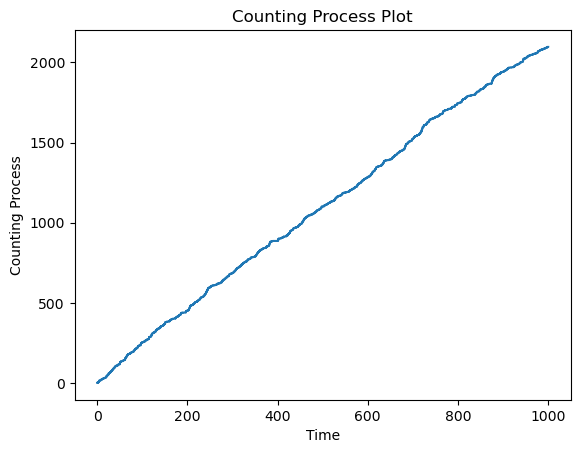

In [8]:
plot_counting_process(hawkes_realisation)

Using constant background, we expect number of immigrants equal to max_T. (Here = 1000.)

Using exponential kernel, we expect branching factor to be $\alpha/\delta$ and so cluster size is $\frac{1}{1-\alpha/\delta} = \frac{\delta}{\delta-\alpha}$. (Here = 2.)

Thus here we expect roughly 2000 events. Let's simulate this multiple times.

In [13]:
max_T = 1000

num_samples = 100
num_events = np.zeros(num_samples)
for i in range(num_samples):
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
    num_events[i] = len(hawkes_realisation)

print(np.mean(num_events))

2015.58


Very close to 2000, so good!

In [14]:
def zero_kernel(t):

    return np.zeros_like(t)

In [17]:
max_T = 1000

num_samples = 100
num_events = np.zeros(num_samples)
for i in range(num_samples):
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, zero_kernel)
    num_events[i] = len(hawkes_realisation)

print(np.mean(num_events))

1000.98


Here we make the kernel zero so that it reduces to a Poisson process (homogeneous since constant background) and find the right expected number of events again.

### Time-rescaling

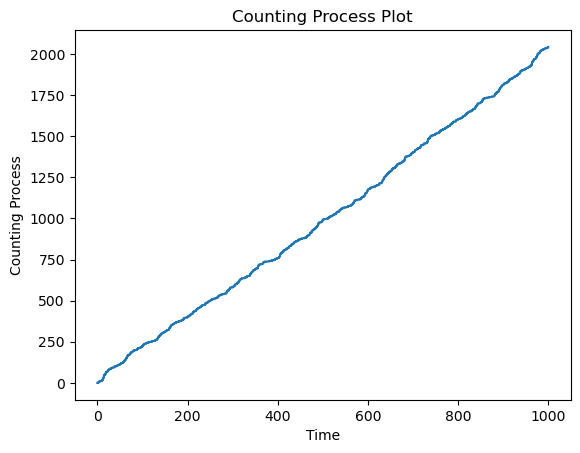

In [4]:
max_T = 1000

hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
plot_counting_process(hawkes_realisation)

In [8]:
taus = rescale_times(hawkes_realisation)

c:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\utils.py:40: RuntimeWarning: overflow encountered in exp
  return np.where(t < 0, 0, alpha * np.exp(-delta * t))


In [9]:
z_list = [(1 - np.exp(-tau)) for tau in taus]

(array([1.02918513, 0.91156398, 1.07819395, 1.00958161, 1.07819395,
        0.96057279, 1.02918513, 1.02428425, 0.90666309, 0.98017632]),
 array([0.        , 0.09992406, 0.19984811, 0.29977217, 0.39969622,
        0.49962028, 0.59954433, 0.69946839, 0.79939245, 0.8993165 ,
        0.99924056]),
 <BarContainer object of 10 artists>)

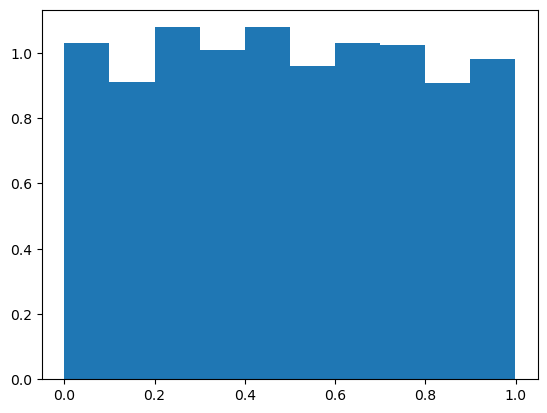

In [10]:
plt.hist(z_list, bins=10, density=True)

In [5]:
taus2 = rescale_times_true_vectorised(hawkes_realisation)

c:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\utils.py:40: RuntimeWarning: overflow encountered in exp
  return np.where(t < 0, 0, alpha * np.exp(-delta * t))


Why is there an overflow warning??

In [6]:
z2 = [(1 - np.exp(-tau)) for tau in taus2]

(array([1.02918513, 0.91156398, 1.07819395, 1.00958161, 1.07819395,
        0.96057279, 1.02918513, 1.02428425, 0.90666309, 0.98017632]),
 array([0.        , 0.09992406, 0.19984811, 0.29977217, 0.39969622,
        0.49962028, 0.59954433, 0.69946839, 0.79939245, 0.8993165 ,
        0.99924056]),
 <BarContainer object of 10 artists>)

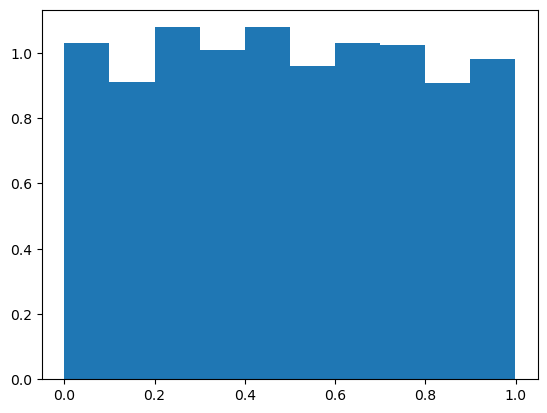

In [7]:
plt.hist(z2, bins=10, density=True)

Code works the same and is quicker using true_vectorised.

In [11]:
np.allclose(taus, taus2)

True

In [13]:
import statsmodels.api as sm

In [15]:
import scipy

(https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy)

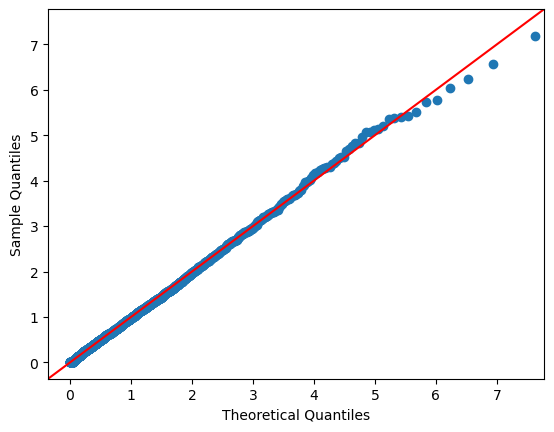

In [24]:
sm.qqplot(np.array(taus2), line='45', dist=scipy.stats.distributions.expon)
plt.show()

Upper quantiles fall off because of edge effects.

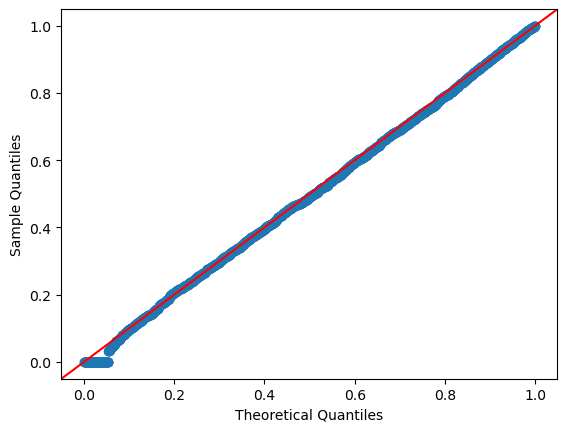

In [25]:
sm.qqplot(np.array(z2), line='45', dist=scipy.stats.distributions.uniform)
plt.show()

QQ plots look good (on uniform plot, points close to 0 lie on horizontal line, is this OK?) Wait - think this is also edge effects.

From this we conclude `sample_hawkes_process_thinning_true_vectorised` works properly!

### MLE

In [40]:
a = np.array([1,2,5,15])
max_T = 7

mask = (a < 7)

b = np.exp(a)
b = np.where(mask, b, 0)
np.sum(b)

158.5204970299663

In [41]:
a = a[:, np.newaxis]

array([[ 1],
       [ 2],
       [ 5],
       [15]])

array([[ 0,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 4,  3,  0,  0],
       [14, 13, 10,  0]])

## Simulation with clustering

Usage:

In [30]:
max_T = 1000

hawkes_realisation = sample_hawkes_process_clustering(max_T)

In [28]:
hawkes_realisation

{0: {0: [0.1676856966758992],
  1: [0.20959062306952497],
  2: [1.0318550954397852]},
 1: {0: [0.3743306364407854], 1: [1.294617015880387]},
 2: {0: [1.1648210194115882]},
 3: {0: [1.4471653514743417], 1: [1.540452267731655], 2: [1.8717038745273422]},
 4: {0: [1.876675425266641], 1: [1.9294152862986487, 2.541404832761927]},
 5: {0: [2.246059123832273], 1: [2.640124590827611, 2.711763573076134]},
 6: {0: [2.77812333481026], 1: [2.8128583447935807], 2: [3.8691345046507726]},
 7: {0: [4.3069009365065245], 1: [5.2471971799545205]},
 8: {0: [4.566798824426485], 1: [4.699537582941931, 5.4043010413469625]},
 9: {0: [5.271480315044274]},
 10: {0: [6.051569252961816],
  1: [6.11201353387494, 6.3618488261062645, 6.409792382176814],
  2: [7.575307450528243, 8.554764983286772],
  3: [9.397190477445106]},
 11: {0: [6.459507283397577], 1: [6.71420168766587]},
 12: {0: [6.984211596110903],
  1: [7.120500903655019, 7.295704713641051],
  2: [7.503294932528823, 7.295822440667267],
  3: [7.35820861209349

In [29]:
sum = 0
for cluster in hawkes_realisation.values():
    for lst in cluster.values():
        sum += len(lst)
print(sum)

2095
